In [6]:
import subprocess
subprocess.run(['jupyter', 'nbconvert', '--to', 'python', 'titanic.ipynb'])

CompletedProcess(args=['jupyter', 'nbconvert', '--to', 'python', 'titanic.ipynb'], returncode=0)

importは1つ目のセルに入れる。
依存ライブラリを明白にするため。

In [7]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import tree

# データimport

In [8]:
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/test.csv
input/train.csv


In [9]:
df_train = pd.read_csv('input/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_test = pd.read_csv('input/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
print(df_train.shape)

(891, 12)


In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# データ整形

欠損データを保管する。

```
df['列'].fillna(保管データ)
```

を用いる。

In [14]:
def store_null_to_median(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Cabin'].fillna('0', inplace=True)
    df['Embarked'].fillna('0', inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    return df

df_train['Embarked'].dropna()

df_train = store_null_to_median(df_train)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [15]:
null_val=df_train.isnull().sum()
null_val

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

文字列データを数値に変換する。

```
df.loc[条件, 列] = 列への代入値
```
を用いる。

In [16]:
def convert_string_to_number(df):
    df.loc[df['Sex'] == 'male', 'n_Sex'] = 0
    df.loc[df['Sex'] == 'female', 'n_Sex'] = 1
    df.loc[df['Embarked'] == 'S', 'n_Embarked'] = 0
    df.loc[df['Embarked'] == 'C', 'n_Embarked'] = 1
    df.loc[df['Embarked'] == 'Q', 'n_Embarked'] = 2
    df['n_Embarked'] = df['n_Embarked'].fillna(df['n_Embarked'].median())
    df.loc[df['Cabin'].str.startswith('A'), 'n_Cabin'] = 1
    df.loc[df['Cabin'].str.startswith('B'), 'n_Cabin'] = 2
    df.loc[df['Cabin'].str.startswith('C'), 'n_Cabin'] = 3
    df.loc[df['Cabin'].str.startswith('D'), 'n_Cabin'] = 4
    df.loc[df['Cabin'].str.startswith('E'), 'n_Cabin'] = 5
    df.loc[df['Cabin'].str.startswith('F'), 'n_Cabin'] = 6
    df.loc[df['Cabin'].str.startswith('G'), 'n_Cabin'] = 7
    df.loc[df['Cabin'].str.startswith('T'), 'n_Cabin'] = 8
    df.loc[df['Cabin']==('0'), 'n_Cabin'] = df['n_Cabin'].median()
    return df

df_train = convert_string_to_number(df_train)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,n_Sex,n_Embarked,n_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0.0,0.0,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1.0,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1.0,0.0,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0.0,0.0,3.0


# データ可視化

参考： [【Kaggle】Titanicを可視化してみる【Seaborn】 | 趣味で始める機械学習](https://ct-innovation01.xyz/DL-Freetime/kaggle-003/)

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


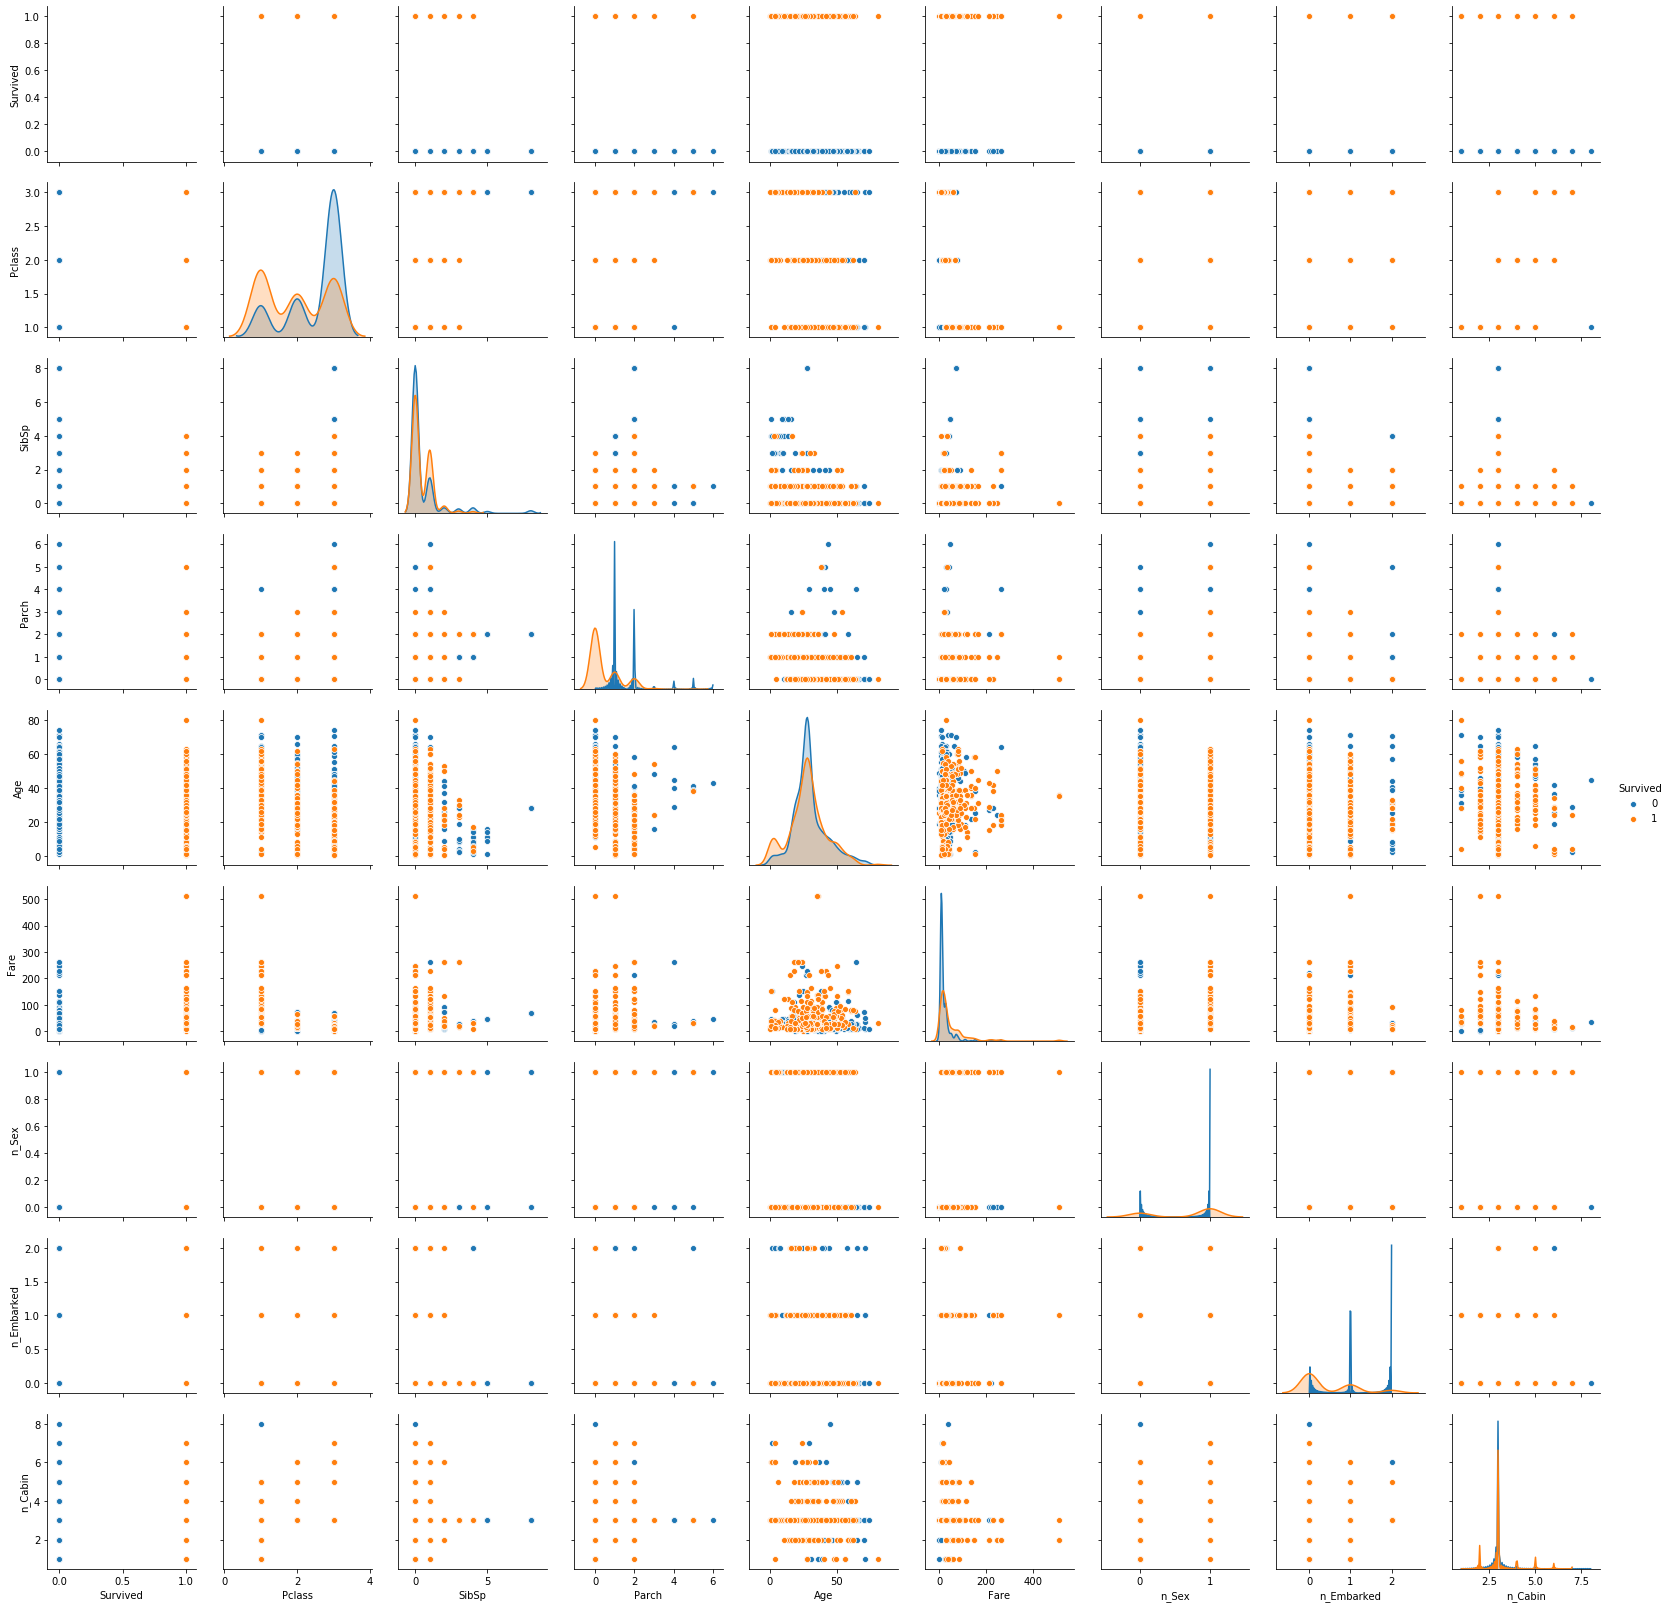

In [17]:
sns.pairplot(df_train[['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'n_Sex', 'n_Embarked', 'n_Cabin']], hue='Survived')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


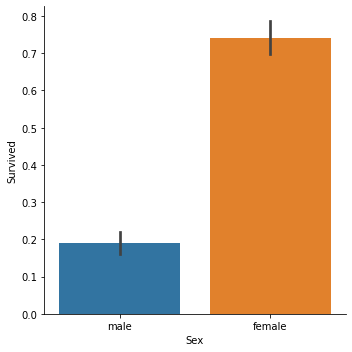

In [18]:
sns.factorplot(
    x = 'Sex',
    y = 'Survived',
    data = df_train,
    kind='bar'
)

plt.show()

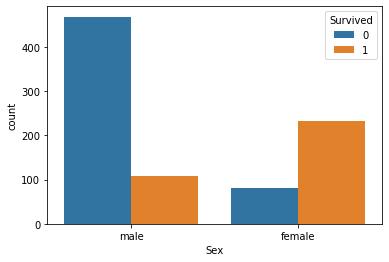

In [19]:
sns.countplot(
    x = 'Sex',
    hue = 'Survived',
    data = df_train
)

plt.show()

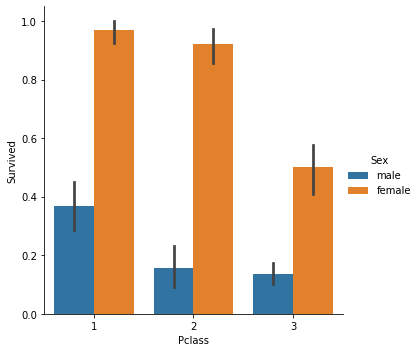

In [20]:
sns.factorplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    data=df_train,
    kind='bar'
)

plt.show()

# 予測モデル作成

In [21]:
target = df_train['Survived'].values

def setData(df):
    return df[[
        'Pclass',
        'n_Sex',
        'Age',
        'Fare',
        'n_Embarked',
        'n_Cabin'
    ]].values

features = setData(df_train)

titanic_tree = tree.DecisionTreeClassifier()
titanic_tree = titanic_tree.fit(features, target)

# 対象データ整形

In [22]:
df_test = store_null_to_median(df_test)
df_test = convert_string_to_number(df_test)
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
n_Sex          0
n_Embarked     0
n_Cabin        0
dtype: int64

# データ推測

In [23]:
test_features = setData(df_test)

my_prediction = titanic_tree.predict(test_features)

In [24]:
PassengerId = np.array(df_test['PassengerId']).astype(int)

my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])

my_solution.to_csv('gender_submission.csv', index_label = ["PassengerId"])